In [1]:
# Import all the necessary files!
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [2]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3


pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = 'imagenet')

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
  layer.trainable = False
  
# Print the model summary
pre_trained_model.summary()

67[0][0]              
__________________________________________________________________________________________________
conv2d_69 (Conv2D)              (None, 7, 7, 192)    147456      average_pooling2d_6[0][0]        
__________________________________________________________________________________________________
batch_normalization_60 (BatchNo (None, 7, 7, 192)    576         conv2d_60[0][0]                  
__________________________________________________________________________________________________
batch_normalization_63 (BatchNo (None, 7, 7, 192)    576         conv2d_63[0][0]                  
__________________________________________________________________________________________________
batch_normalization_68 (BatchNo (None, 7, 7, 192)    576         conv2d_68[0][0]                  
__________________________________________________________________________________________________
batch_normalization_69 (BatchNo (None, 7, 7, 192)    576         conv2d_69[0][0]      

In [3]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Expected Output:
# ('last layer output shape: ', (None, 7, 7, 768))

last layer output shape:  (None, 7, 7, 768)


In [4]:
DESIRED_ACCURACY = 0.99
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}) :
        if(logs.get('acc') is not None and logs.get('acc') >= DESIRED_ACCURACY) :
            print('\nReached 99.9% accuracy so cancelling training!')
            self.model.stop_training = True

In [5]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.summary()

              
__________________________________________________________________________________________________
activation_45 (Activation)      (None, 7, 7, 160)    0           batch_normalization_45[0][0]     
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 7, 7, 160)    122880      mixed4[0][0]                     
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 7, 7, 160)    179200      activation_45[0][0]              
__________________________________________________________________________________________________
batch_normalization_41 (BatchNo (None, 7, 7, 160)    480         conv2d_41[0][0]                  
__________________________________________________________________________________________________
batch_normalization_46 (BatchNo (None, 7, 7, 160)    480         conv2d_46[0][0]              

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip =True )
train_generator = train_datagen.flow_from_directory('data/training_set',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 2785 images belonging to 2 classes.


In [11]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
validation_generator = test_datagen.flow_from_directory('data/test_set',
                                            target_size = (150,150),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 504 images belonging to 2 classes.


In [19]:
callbacks = myCallback()
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 10,
            epochs = 30,
            validation_steps = 50,
            verbose = 2,
            callbacks=[callbacks])

Epoch 1/30
10/10 - 12s - loss: 0.4269 - accuracy: 0.8000 - val_loss: 0.4236 - val_accuracy: 0.7996
Epoch 2/30
10/10 - 13s - loss: 0.3972 - accuracy: 0.8375 - val_loss: 0.4654 - val_accuracy: 0.7778
Epoch 3/30
10/10 - 12s - loss: 0.4757 - accuracy: 0.7625 - val_loss: 0.4695 - val_accuracy: 0.7758
Epoch 4/30
10/10 - 12s - loss: 0.4568 - accuracy: 0.8094 - val_loss: 0.4564 - val_accuracy: 0.7798
Epoch 5/30
10/10 - 14s - loss: 0.4158 - accuracy: 0.8188 - val_loss: 0.4080 - val_accuracy: 0.8135
Epoch 6/30
10/10 - 13s - loss: 0.4569 - accuracy: 0.7969 - val_loss: 0.4579 - val_accuracy: 0.7937
Epoch 7/30
10/10 - 16s - loss: 0.4817 - accuracy: 0.7719 - val_loss: 0.5805 - val_accuracy: 0.7103
Epoch 8/30
10/10 - 12s - loss: 0.3422 - accuracy: 0.8656 - val_loss: 0.4865 - val_accuracy: 0.7778
Epoch 9/30
10/10 - 12s - loss: 0.3940 - accuracy: 0.8156 - val_loss: 1.1934 - val_accuracy: 0.5734
Epoch 10/30
10/10 - 12s - loss: 0.3843 - accuracy: 0.8125 - val_loss: 0.4176 - val_accuracy: 0.8115
Epoch 11/

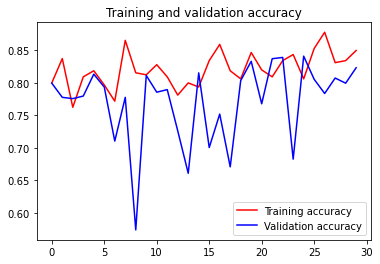

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

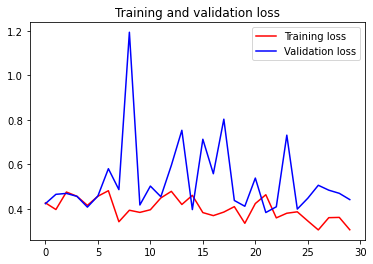

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()